In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
#import the cleaned data
data = pd.read_csv('datacleanedup.csv')
data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters,specials,gas_type,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,0,0,0,45.0,other,E10,E10,1.38,1.4000,1.960000,0.070000
1,12.0,4.2,30,21.5,13,0,0,0,0.0,other,E10,E10,1.38,0.5040,0.254016,0.021168
2,11.2,5.5,38,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.6160,0.379456,0.033880
3,12.9,3.9,36,21.5,14,0,0,0,0.0,other,E10,E10,1.38,0.5031,0.253110,0.019621
4,18.5,4.5,46,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.8325,0.693056,0.037463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.0,0.0,39,0.0,18,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
750,0.0,0.0,38,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345
751,0.0,0.0,45,0.0,19,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
752,0.0,0.0,42,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345


In [3]:
numerical = data.select_dtypes(np.number)

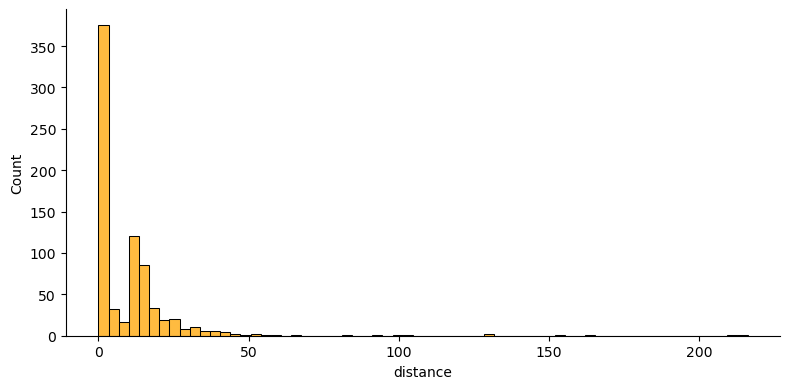

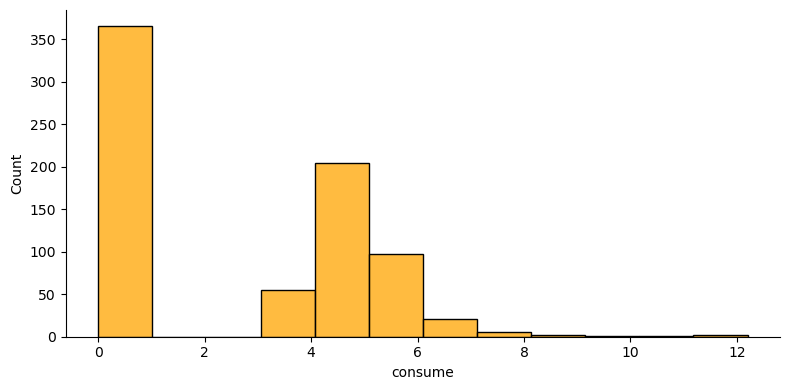

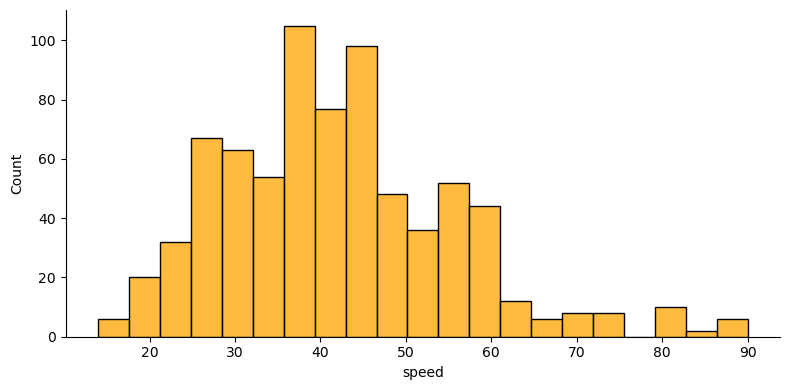

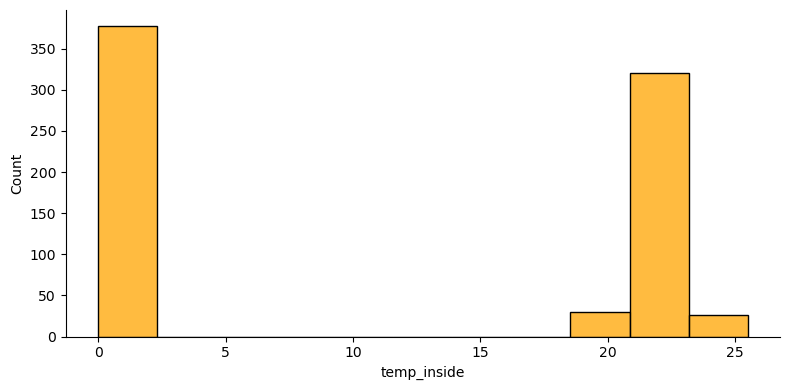

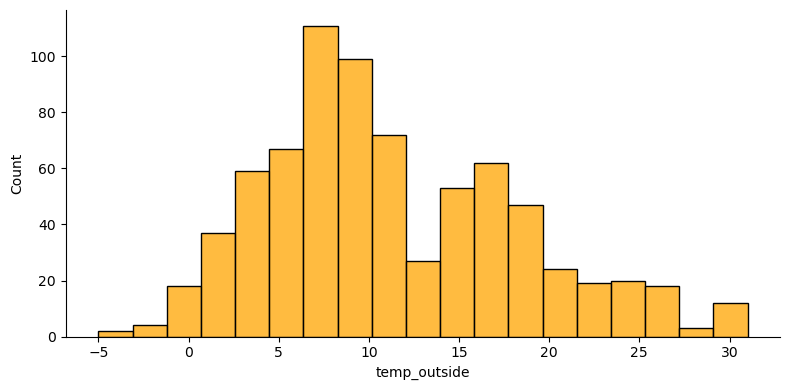

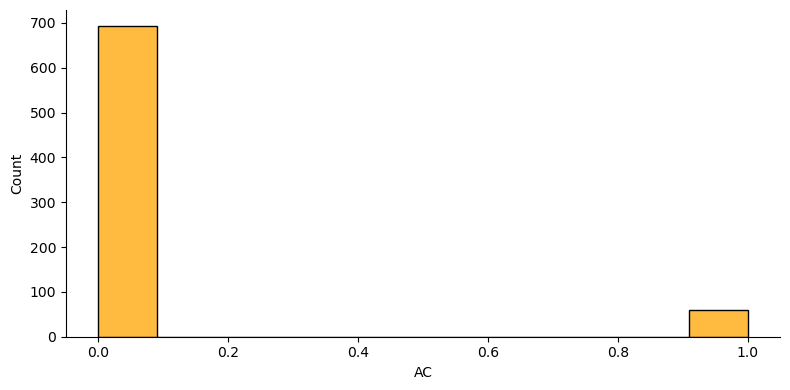

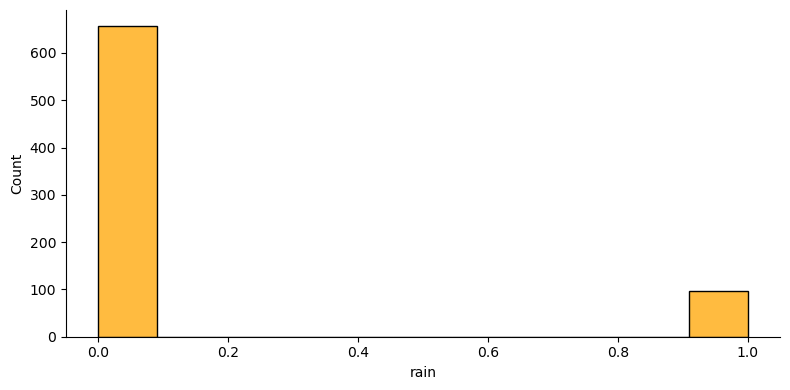

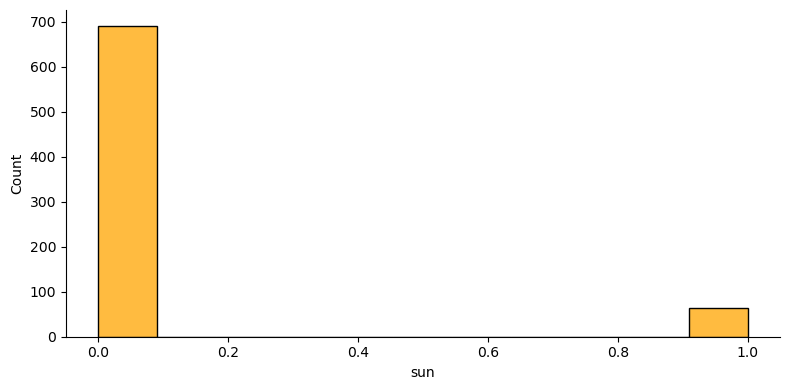

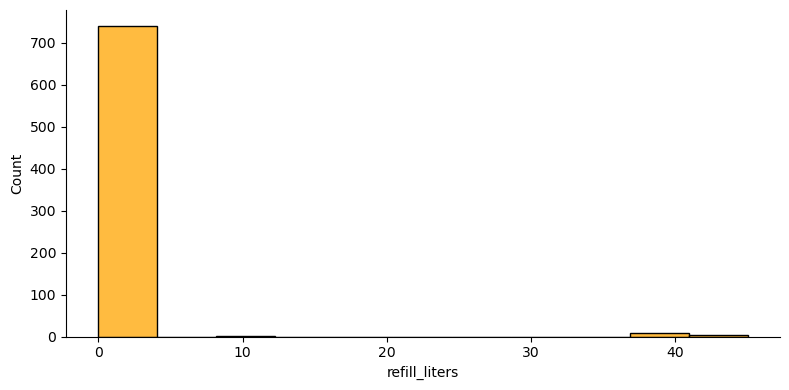

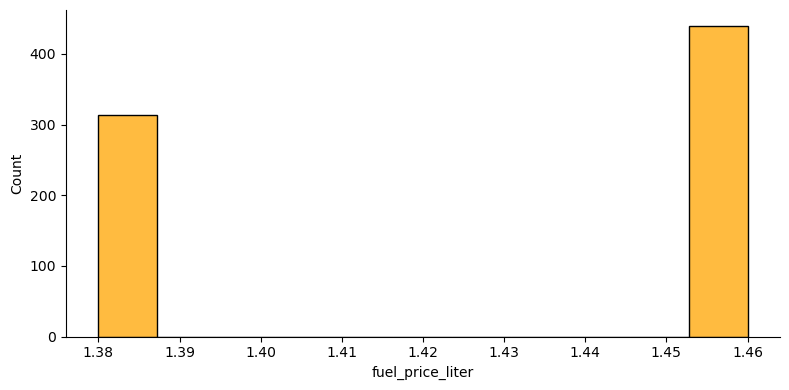

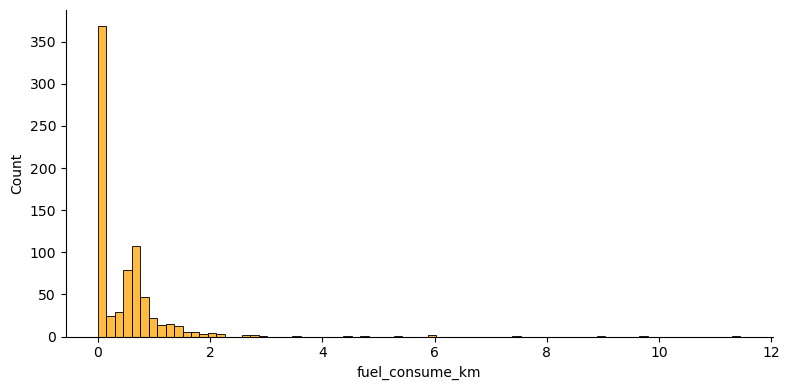

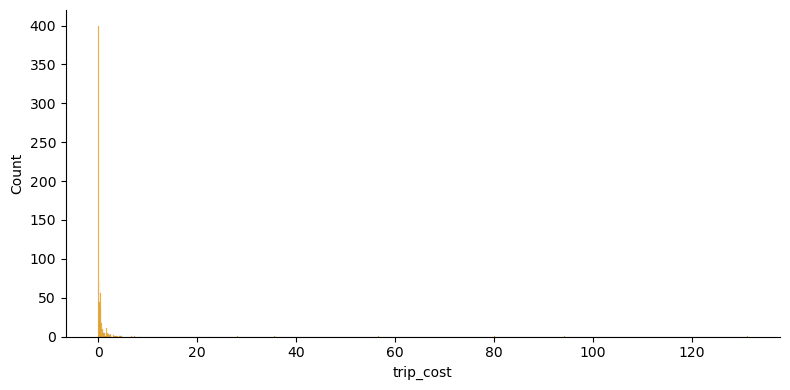

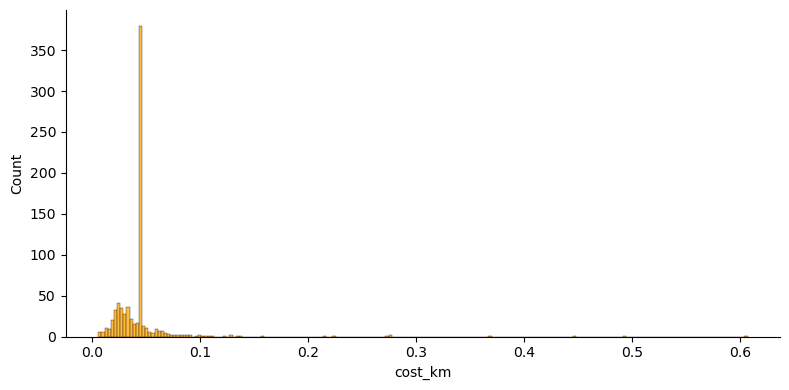

In [4]:
#Creating distribution plots for the numerical variables to visualize our dataset
for feature in numerical:
    sns.displot(data=data, x=feature, height=4, aspect=2, color= 'orange')

In [5]:
mean_distance_by_type = data.groupby('gas_type')['distance'].mean().reset_index()
mean_distance_by_type

,gas_type,distance
0,E10,10.749682
1,SP98,9.658864


In [6]:
mean_consumption_by_type = data.groupby('gas_type')['consume'].mean().reset_index()
mean_consumption_by_type

,gas_type,consume
0,E10,2.512739
1,SP98,2.538636


In [7]:
mean_consumption_km_by_type = data.groupby('gas_type')['fuel_consume_km'].mean().reset_index()
mean_consumption_km_by_type

,gas_type,fuel_consume_km
0,E10,0.514106
1,SP98,0.457875


In [8]:
mean_speed_by_type = data.groupby('gas_type')['speed'].mean().reset_index()
mean_speed_by_type

,gas_type,speed
0,E10,43.601911
1,SP98,40.920455


In [9]:
mean_consumption_by_sun = data[data['sun'] == 1].groupby(['gas_type', 'sun'])['fuel_consume_km'].mean().reset_index()
mean_consumption_by_sun

,gas_type,sun,fuel_consume_km
0,E10,1,0.519558
1,SP98,1,0.643659


In [10]:
mean_consumption_by_AC = data[data['AC'] == 1].groupby(['gas_type', 'AC'])['fuel_consume_km'].mean().reset_index()
mean_consumption_by_AC

,gas_type,AC,fuel_consume_km
0,E10,1,0.629971
1,SP98,1,0.371289


Regarding distance, speed and mean of consumption, E10 has better performance. Even in sunny condtions where we can hypothize that the windows are open, E10 has lower consumption. On the other hand, SP98 has lower consumption when the AC is turned on.

## Visualization of the above results

In [11]:
mean_consumption_km_by_distance_by_type = data.groupby(['gas_type', 'distance'])['fuel_consume_km'].mean().reset_index()
mean_consumption_km_by_distance_by_type

,gas_type,distance,fuel_consume_km
0,E10,0.0,0.0000
1,E10,1.7,0.1836
2,E10,2.0,0.1410
3,E10,4.1,0.2214
4,E10,4.2,0.2114
...,...,...,...
208,SP98,56.1,2.6928
209,SP98,153.5,7.5215
210,SP98,162.7,8.9485
211,SP98,211.0,9.7060


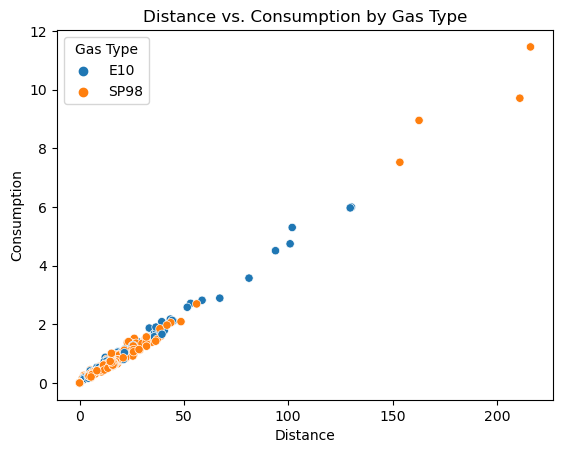

In [12]:
sns.scatterplot(x='distance', y='fuel_consume_km', hue='gas_type', data=data)
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.title('Distance vs. Consumption by Gas Type') 
plt.legend(title='Gas Type')
plt.show()


In [13]:
mean_consumption_km_by_speed_by_type = data.groupby(['gas_type','speed'])['fuel_consume_km'].mean().reset_index()

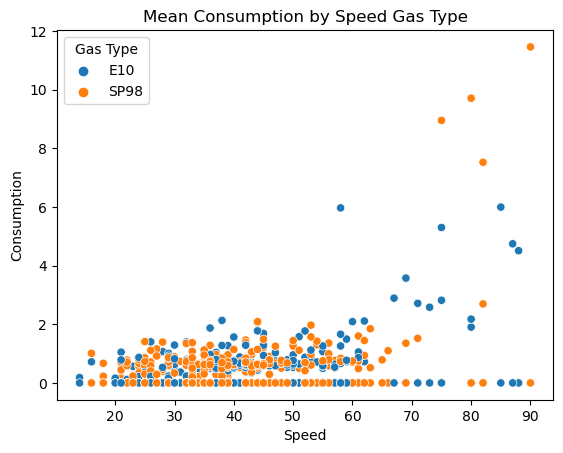

In [14]:
sns.scatterplot(x='speed', y='fuel_consume_km', hue='gas_type', data=data)
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Speed Gas Type') 
plt.legend(title='Gas Type')
plt.show()


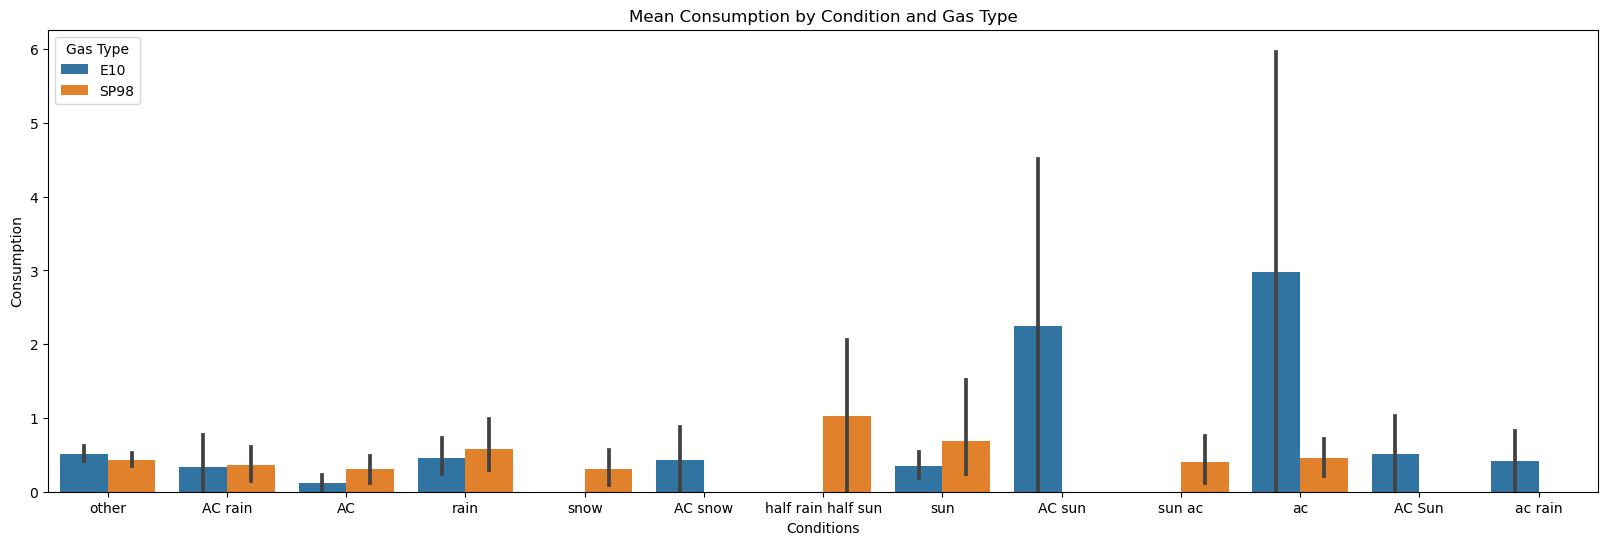

In [15]:
plt.figure(figsize=(20, 6))
sns.barplot(x='specials', y='fuel_consume_km', hue='gas_type', data=data)
plt.xlabel('Conditions')
plt.ylabel('Consumption')
plt.title('Mean Consumption by Condition and Gas Type')
plt.legend(title='Gas Type')
plt.show()

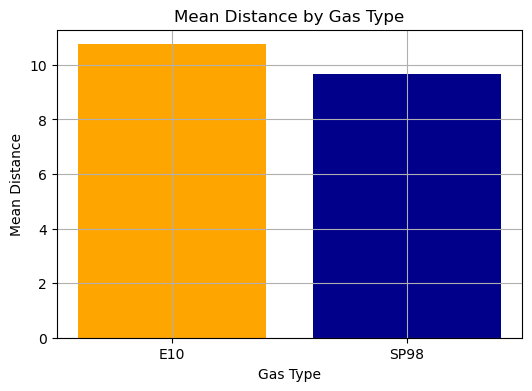

In [24]:
mean_distance_by_type = mean_distance_by_type.loc[mean_distance_by_type['gas_type'].isin(['SP98', 'E10'])]

plt.figure(figsize=(6, 4))

colors = ['orange', 'darkblue']

plt.bar(mean_distance_by_type['gas_type'], mean_distance_by_type['distance'], color=colors)

plt.xlabel('Gas Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Gas Type')
plt.grid(True)
plt.show()

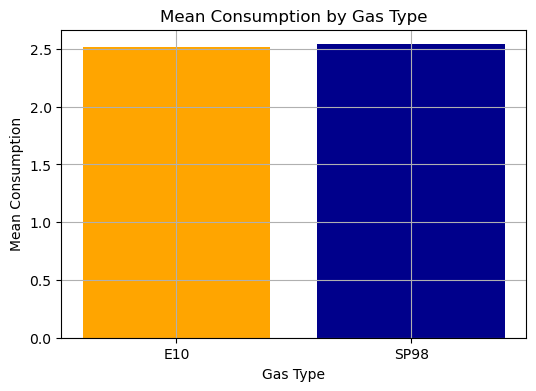

In [23]:
mean_consumption_by_type = mean_consumption_by_type.loc[mean_consumption_by_type['gas_type'].isin(['SP98', 'E10'])]

plt.figure(figsize=(6, 4))

colors = ['orange', 'darkblue']

plt.bar(mean_consumption_by_type['gas_type'], mean_consumption_by_type['consume'], color=colors)

plt.xlabel('Gas Type')
plt.ylabel('Mean Consumption')
plt.title('Mean Consumption by Gas Type')
plt.grid(True)
plt.show()